<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [1]:
import numpy as np
import pandas as pd

# Import libraries and modules

import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Pre-processing

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [4]:
len(train.label.unique())

10

In [5]:
train.shape

(42000, 785)

In [6]:
X = train.drop(columns = 'label', axis = 1)
y = train['label']

X = X.astype('float32')

X /= 255

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# need to convert from dataframe to numpy 
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [9]:
X_train.shape

(28140, 784)

In [10]:
# reshape X_train and tst
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [11]:
# one hot code 
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [12]:
#check y_train
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
X_train.shape

(28140, 28, 28, 1)

# Fitting feedforawrd convolutional neural network

In [14]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters=16,             # number of filters
                       kernel_size=(3,3),      # height/width of filter
                       activation='relu',      # activation function 
                       input_shape=(28,28,1),
                       padding = 'same')) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling
    
# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size=(3,3),
                       activation='relu'))
                       
# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.3))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.3))

# Add a final layer with 10 neurons.
cnn_model_2.add(Dense(10, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          verbose=1)

Train on 28140 samples, validate on 13860 samples
Epoch 1/10
28140/28140 [==============================] - 7s 264us/sample - loss: 0.8379 - accuracy: 0.7203 - val_loss: 0.1518 - val_accuracy: 0.9563
Epoch 2/10
28140/28140 [==============================] - 1s 39us/sample - loss: 0.2678 - accuracy: 0.9209 - val_loss: 0.0943 - val_accuracy: 0.9724
Epoch 3/10
28140/28140 [==============================] - 1s 41us/sample - loss: 0.1967 - accuracy: 0.9435 - val_loss: 0.0739 - val_accuracy: 0.9789
Epoch 4/10
28140/28140 [==============================] - 1s 39us/sample - loss: 0.1514 - accuracy: 0.9578 - val_loss: 0.0674 - val_accuracy: 0.9815
Epoch 5/10
28140/28140 [==============================] - 1s 41us/sample - loss: 0.1285 - accuracy: 0.9630 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 6/10
28140/28140 [==============================] - 1s 39us/sample - loss: 0.1106 - accuracy: 0.9667 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 7/10
28140/28140 [==============================]

In [15]:
# Check out the model summary.
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

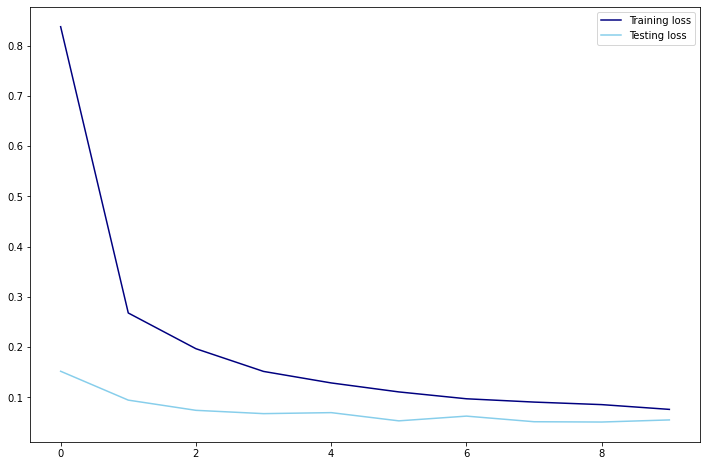

In [16]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

# still underfitted

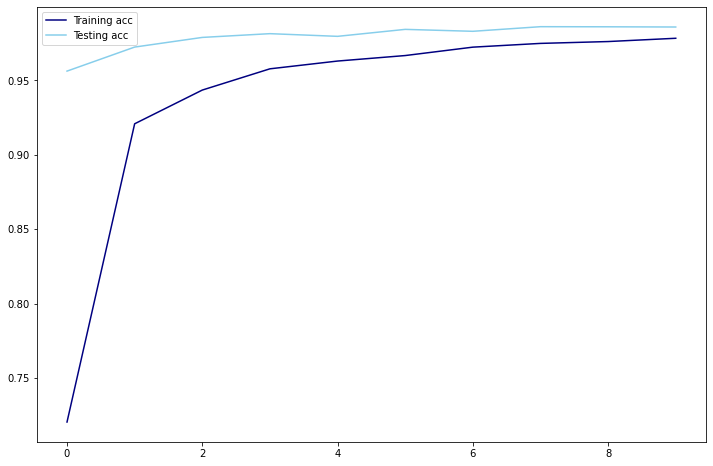

In [17]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training acc', color='navy')
plt.plot(test_loss, label='Testing acc', color='skyblue')
plt.legend();

# still underfitted